# Generate MPNN Figure
## Description
This figure has The parity showing horizontal lines in the training for Tm
This figure also has the figure for message passing results + ensemble

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

# Load Data

In [63]:
kfold_err_df = pd.read_csv("../../Data/dataframes/full_err_All_df.csv")
achiral_df = pd.read_csv("../../Data/dataframes/achiral_predictions.csv")
chiral_df = pd.read_csv("../../Data/dataframes/pm_predictions.csv")

achiral_df["dTm"] = abs(achiral_df.Tm - achiral_df.Tm_pred)
achiral_df["dTg"] = abs(achiral_df.Tg - achiral_df.Tg_pred)

chiral_df["dTm"] = abs(chiral_df.Tm - chiral_df.Tm_pred)
chiral_df["dTg"] = abs(chiral_df.Tg - achiral_df.Tg_pred)

In [64]:
replace_poly_dict = {
    "MPNN_global_pm": r"${MPNN_{\mathrm{chiral}}}$",
    "MPNN_global_pm_no_ctag": r"${MPNN_{\mathrm{pm}}}$",
    "MPNN_ctag": r"${MPNN_{\mathrm{ctag}}}$",
    "MPNN_no_chiral": r"${MPNN_{\mathrm{nochiral}}}$",
    "RF_no_pm": "RF$_{achiral}$",
    "RF_pm": "RF$_{chiral}$",
    "GB_nopm": r"${GB_\mathrm{nochiral}}}$",
    "GB_pm": r"${GB_\mathrm{{chiral}}}$",
}

{r"${MPNN_{\mathrm{pm}}}$": "o", r"${MPNN_{\mathrm{ctag}}}$": "D"}

replace_PLA_dict = {
    "Chiral": r"${MPNN_{\mathrm{chiral}}}$",
    "Nonchiral": r"${MPNN_{\mathrm{nochiral}}}$"
}

replace_var_dict = {"Tm_MAE": "T$_{m}$ MAE", "Tg_MAE": "T$_{g}$ MAE", "Tg_RMSE": "T$_{g}$ RMSE", "Tm_RMSE": "T$_{m}$ RMSE"}

kfold_err_df = pd.read_csv("../../data/dataframes/full_err_MPNN_df.csv")
df_allmodel = kfold_err_df.melt(id_vars=["model", "model_id"], value_vars=["Tm_MAE", "Tg_MAE", "Tm_RMSE", "Tg_RMSE"])

df_poly = df_allmodel.copy()
df_poly.loc[:, "model"] = df_poly.model.map(lambda s: replace_poly_dict[s] if s in replace_poly_dict.keys() else None)

poly_order_map = ["MPNN_global_pm_no_ctag", "MPNN_global_pm", "MPNN_ctag", "MPNN_no_chiral"]
poly_order_map = {k: i for i, k in enumerate(poly_order_map)}

df_poly = df_allmodel[df_allmodel.model.str.contains("|".join([i + "$" for i in poly_order_map]))].copy()
df_poly.loc[:, "model"] = df_poly.model.apply(lambda s: replace_poly_dict[s])
df_poly.loc[:, "variable"] = df_poly.variable.apply(lambda s: replace_var_dict[s])
order_map = {replace_poly_dict[k]: i for i, k in enumerate(poly_order_map)}

In [65]:
df_poly

,model,model_id,variable,value
10,${MPNN_{\mathrm{ctag}}}$,0,T$_{m}$ MAE,22.280873
11,${MPNN_{\mathrm{ctag}}}$,1,T$_{m}$ MAE,14.016627
12,${MPNN_{\mathrm{ctag}}}$,2,T$_{m}$ MAE,11.005036
13,${MPNN_{\mathrm{ctag}}}$,3,T$_{m}$ MAE,19.873655
14,${MPNN_{\mathrm{ctag}}}$,4,T$_{m}$ MAE,13.017282
...,...,...,...,...
345,${MPNN_{\mathrm{nochiral}}}$,5,T$_{g}$ RMSE,22.551049
346,${MPNN_{\mathrm{nochiral}}}$,6,T$_{g}$ RMSE,19.957491
347,${MPNN_{\mathrm{nochiral}}}$,7,T$_{g}$ RMSE,13.033303
348,${MPNN_{\mathrm{nochiral}}}$,8,T$_{g}$ RMSE,24.973323


In [82]:
df_GB_pm = pd.read_csv("GB_training/GB_results/MAE_GB_pm_results.csv")
df_GB_pm = df_GB_pm.groupby(by="model_id").agg("mean").reset_index(drop=False)
df_GB_pm["model"] = r"${GB_{\mathrm{chiral}}}$"

df_GB_no_pm = pd.read_csv("GB_training/GB_results/MAE_GB_nopm_results.csv")
df_GB_no_pm = df_GB_no_pm.groupby(by="model_id").agg("mean").reset_index(drop=False)
df_GB_no_pm["model"] = r"${GB_{\mathrm{nochiral}}}$"

df_KRR_pm = pd.read_csv("KRR_training/KRR_results/MAE_KRR_pm_results.csv")
df_KRR_pm = df_KRR_pm.groupby(by="model_id").agg("mean").reset_index(drop=False)
df_KRR_pm["model"] = r"${KRR_{\mathrm{chiral}}}$"

df_KRR_no_pm = pd.read_csv("KRR_training/KRR_results/MAE_KRR_nopm_results.csv")
df_KRR_no_pm = df_KRR_no_pm.groupby(by="model_id").agg("mean").reset_index(drop=False)
df_KRR_no_pm["model"] = r"${KRR_{\mathrm{nochiral}}}$"

df_RF_no_pm = pd.read_csv("RF_training/RF_results/MAE_RF_nopm_results.csv")
df_RF_no_pm = df_RF_no_pm.groupby(by="model_id").agg("mean").reset_index(drop=False)
df_RF_no_pm["model"] = r"$RF_{\mathrm{nochiral}}}$"


df_RF_pm = pd.read_csv("RF_training/RF_results/MAE_RF_pm_results.csv")
df_RF_pm = df_RF_pm.groupby(by="model_id").agg("mean").reset_index(drop=False)
df_RF_pm["model"] = r"$RF_{\mathrm{chiral}}}$"

In [109]:
replace_var_dict = {"Tm_MAE": "$T_\mathrm{m}$", "Tg_MAE": "$T_\mathrm{g}$", "T$_{m}$ MAE": "$T_\mathrm{m}$", "T$_{g}$ MAE": "$T_\mathrm{g}$"}
df_all = pd.concat([df_GB_no_pm, df_GB_pm, df_KRR_no_pm, df_KRR_pm, df_RF_no_pm, df_RF_pm])
df_all = df_all.drop(columns=["Unnamed: 0", "Tg", "Tm", "Tg_pred", "Tm_pred"])
df_all = pd.melt(df_all, id_vars=['model_id', 'model'], var_name='variable', value_name='value')
df_all = pd.concat([df_all, df_poly])
df_all = df_all[df_all.variable != r"T$_{g}$ RMSE"]
df_all = df_all[df_all.variable != r"T$_{m}$ RMSE"]
df_all.loc[:, "variable"] = df_all.variable.apply(lambda s: replace_var_dict[s])

In [102]:
df_poly

,model,model_id,variable,value
10,${MPNN_{\mathrm{ctag}}}$,0,T$_{m}$ MAE,22.280873
11,${MPNN_{\mathrm{ctag}}}$,1,T$_{m}$ MAE,14.016627
12,${MPNN_{\mathrm{ctag}}}$,2,T$_{m}$ MAE,11.005036
13,${MPNN_{\mathrm{ctag}}}$,3,T$_{m}$ MAE,19.873655
14,${MPNN_{\mathrm{ctag}}}$,4,T$_{m}$ MAE,13.017282
...,...,...,...,...
345,${MPNN_{\mathrm{nochiral}}}$,5,T$_{g}$ RMSE,22.551049
346,${MPNN_{\mathrm{nochiral}}}$,6,T$_{g}$ RMSE,19.957491
347,${MPNN_{\mathrm{nochiral}}}$,7,T$_{g}$ RMSE,13.033303
348,${MPNN_{\mathrm{nochiral}}}$,8,T$_{g}$ RMSE,24.973323


NameError: name 'df_PLA' is not defined

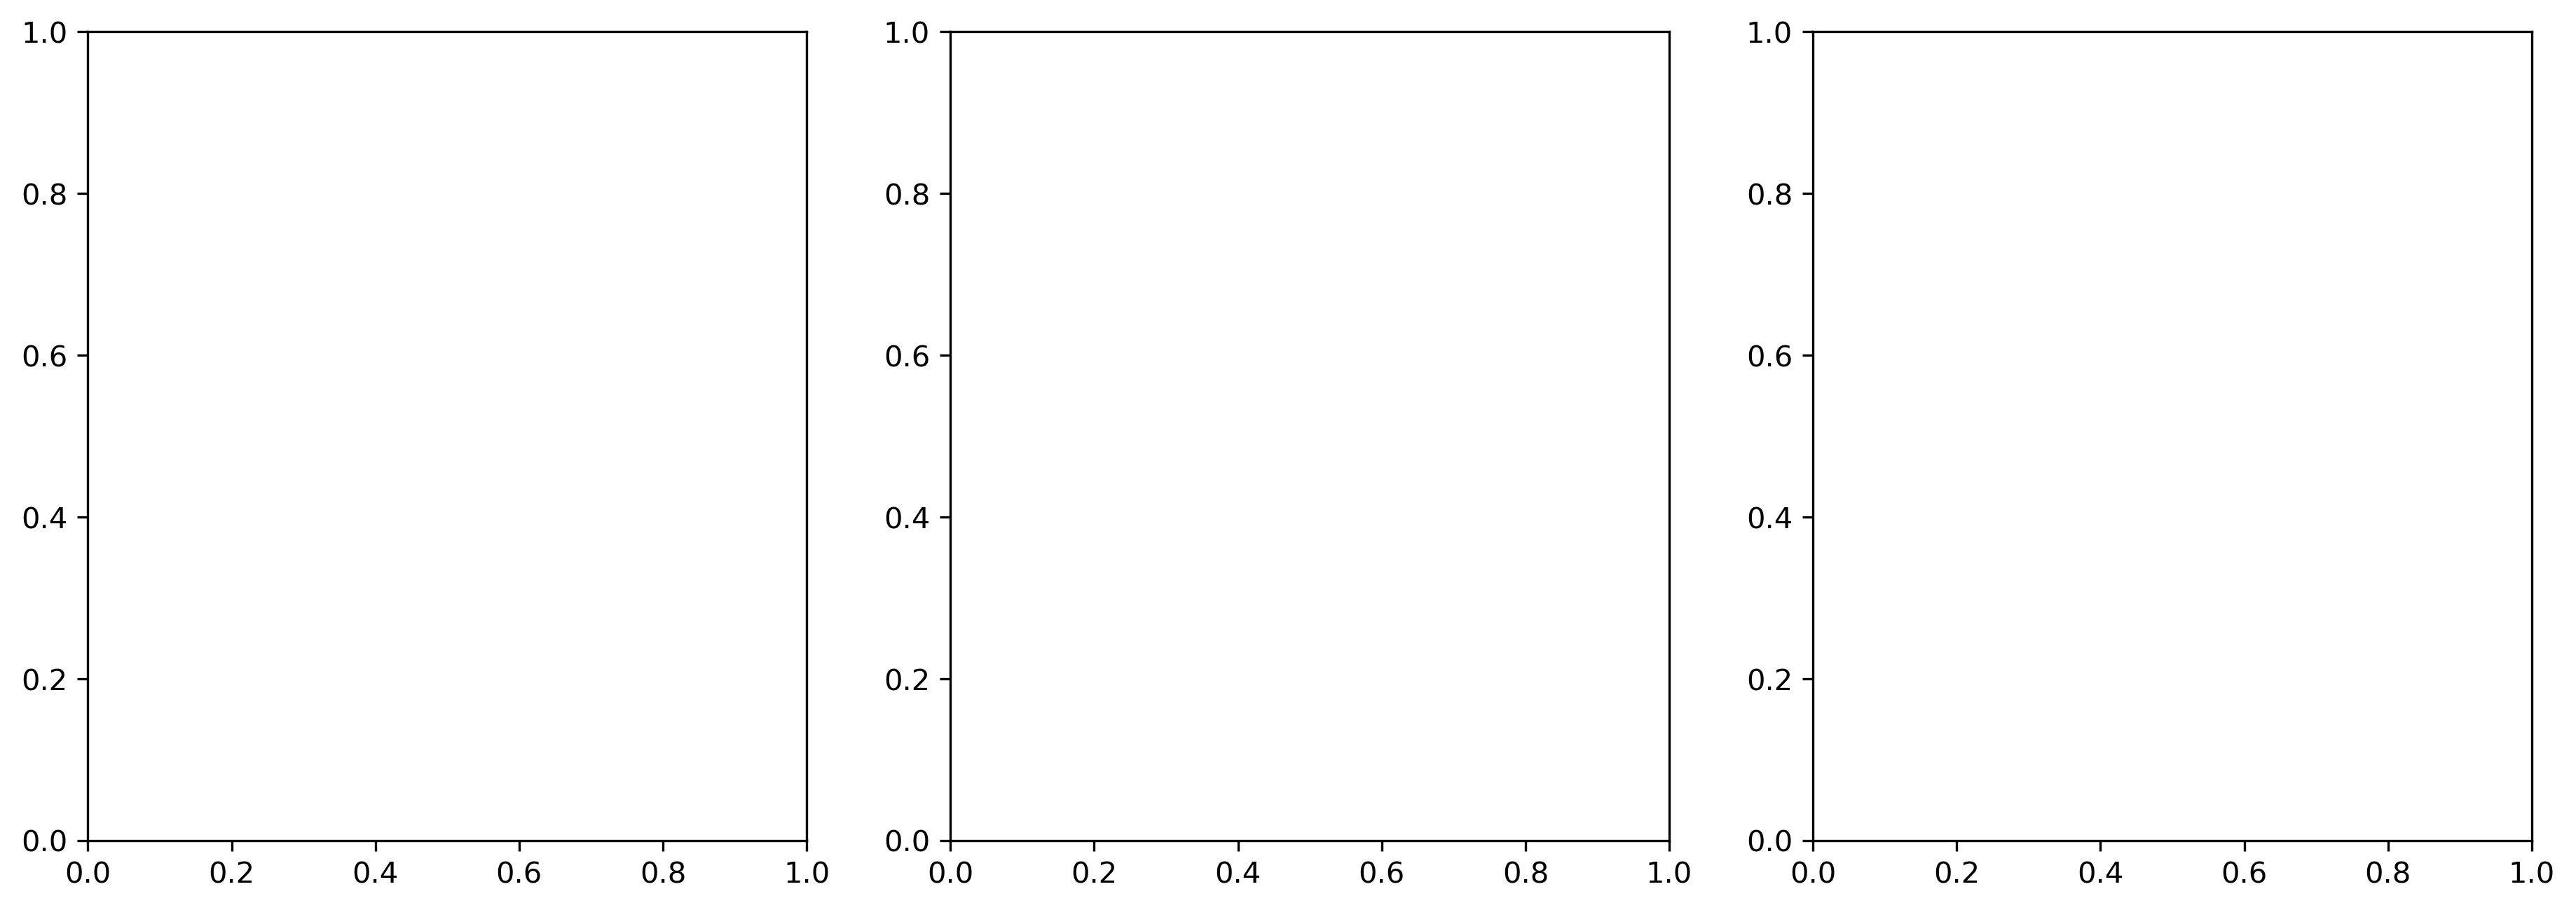

In [104]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=300)
label_size = 18
tick_size = 16
legend_size = 14

######## Plot PLA First
PLA_ax = axs[0]
PLA_markers = {r"${MPNN_{\mathrm{chiral}}}$": "o", r"${MPNN_{\mathrm{nochiral}}}$": "D"}
PLA_scatter_params = {"s": 75}
sns.scatterplot(
    x="Tm", y="Tm_pred", data=df_PLA[df_PLA.model_id == 0],
    style="Model", hue="Model",
    markers=PLA_markers, palette=["#3373a1", "#569045"],
    **PLA_scatter_params,
    ax=PLA_ax
)

# Axes labels and ticks
PLA_ax.set_ylabel(r"${T_\mathrm{{m}}}$ Predicted (°C)", fontsize=label_size)
PLA_ax.set_xlabel(r"${T_\mathrm{{m}}}$ Experimental (°C)", fontsize=label_size)
PLA_ax.tick_params(axis='x', labelsize=tick_size)
PLA_ax.tick_params(axis='y', labelsize=tick_size)

# Limits
PLA_ax.set_ylim(0, 250)
PLA_ax.set_xlim(0, 250)

# Legend
PLA_ax.legend(loc='best', markerscale=1, fontsize=legend_size)

# Line of Parity
PLA_ax.plot([0, 250], [0, 250], linestyle="--", color='k')
######## PLA Plot Done

######## Plot Poly only Model Performance
poly_legend_labels = {r"${MPNN_{\mathrm{pm}}}$": "o", r"${MPNN_{\mathrm{ctag}}}$": "D"}
poly_ax = axs[1]
sns.barplot(y="value",
            x="variable",
            data=df_poly,
            ax=poly_ax,
            palette=["#afccdb", "#3373A1", "#b2d495", "#409239"],
            hue="model",
            hue_order=order_map.keys(),
            order=["T$_{g}$ MAE", "T$_{m}$ MAE"],#, "Tg_RMSE", "Tm_RMSE"],
            edgecolor="white"
           )

# Axes labels and ticks
poly_ax.set_ylabel("Mean Absolute Error (°C)", fontsize=label_size)
poly_ax.set_xlabel("", fontsize=label_size)
poly_ax.set_xticklabels([r"$T_\mathrm{g}$", r"$T_\mathrm{m}$"])
poly_ax.tick_params(axis='x', labelsize=label_size)
poly_ax.tick_params(axis='y', labelsize=tick_size)

poly_ax.set_ylim(0, 30)

# Legend
poly_ax.legend(ncol=1, loc='upper left', fontsize=legend_size)
######## Plot Poly only Model Performance

######## Plot All Comparison only Model Performance
all_ax = axs[2]
sns.barplot(
    y="value",
    x="variable",
    data=df_allmodel,
    ax=all_ax,
    palette=["#3373A1", "#EEA6A5", "#409239", "#CA3335"],
    hue="model", order=["Tg_MAE", "Tm_MAE"],
    edgecolor="white"
)

# Axes labels and ticks
all_ax.set_ylabel("Mean Absolute Error (°C)", fontsize=label_size)
all_ax.set_xlabel("", fontsize=label_size)
all_ax.set_xticklabels([r"$T_\mathrm{g}$", r"$T_\mathrm{m}$"])
all_ax.tick_params(axis='x', labelsize=label_size)
all_ax.tick_params(axis='y', labelsize=tick_size)

all_ax.set_ylim(0, 30)

# Legend
all_ax.legend(ncol=1, loc='upper left', fontsize=legend_size)
######## Plot All Comparison only Model Performance

plt.tight_layout(pad=3)

plt.savefig("./PLA_and_Results_Figure.png", pdi=300)

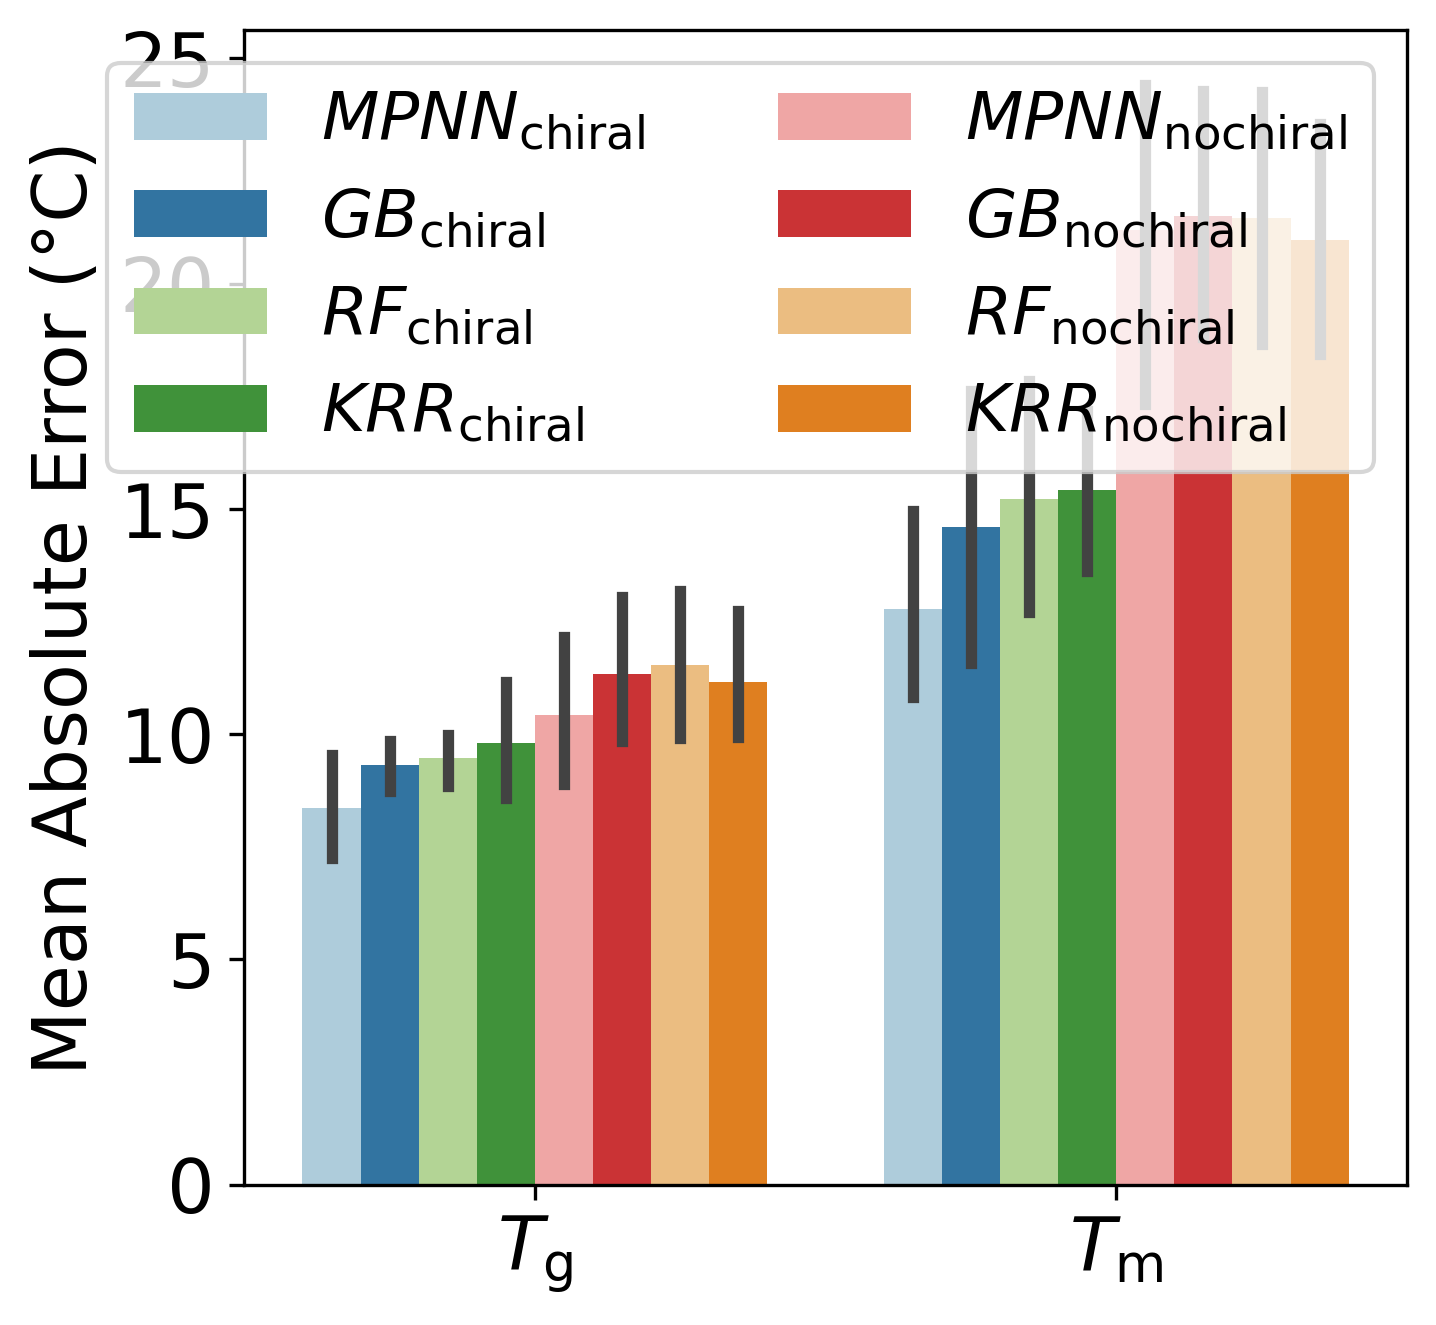

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=300)
label_size = 18
tick_size = 18
legend_size = 16

sns.barplot(
        x="variable",
        y="value",
        hue="model",
        data=df_all,
        palette=sns.color_palette("Paired"),
        hue_order=[r"${MPNN_{\mathrm{chiral}}}$", r"${GB_{\mathrm{chiral}}}$", r"$RF_{\mathrm{chiral}}}$", r"${KRR_{\mathrm{chiral}}}$",  r"${MPNN_{\mathrm{nochiral}}}$", r"${GB_{\mathrm{nochiral}}}$", r"$RF_{\mathrm{nochiral}}}$", r"${KRR_{\mathrm{nochiral}}}$"],
        ax=ax
    )

# Legend
ax.legend(ncol=2, loc='best', markerscale=1, fontsize=legend_size)

ax.get_legend().set_title(None)
ax.set_ylabel("Mean Absolute Error (°C)", size=label_size)
ax.set_xlabel("")
ax.tick_params(axis='x', labelsize=label_size)
ax.tick_params(axis='y', labelsize=tick_size)

In [49]:
df_all.groupby(by=["model", "variable"]).agg("mean")

model_id      value
model                      variable                        
$RF_{\mathrm{chiral}}}     T$_{g}$ MAE       4.5  11.565505
                           T$_{m}$ MAE       4.5  21.749614
$RF_{\mathrm{nochiral}}}   T$_{g}$ MAE       4.5  11.533169
                           T$_{m}$ MAE       4.5  21.467083
${GB_{\mathrm{chiral}}}    T$_{g}$ MAE       4.5   9.317754
                           T$_{m}$ MAE       4.5  14.598838
${GB_{\mathrm{nochiral}}}  T$_{g}$ MAE       4.5  11.332890
                           T$_{m}$ MAE       4.5  21.501564
${KRR_{\mathrm{chiral}}}   T$_{g}$ MAE       4.5   9.814642
                           T$_{m}$ MAE       4.5  15.420111
${KRR_{\mathrm{nochiral}}} T$_{g}$ MAE       4.5  11.164161
                           T$_{m}$ MAE       4.5  20.969170

# Bar Plot

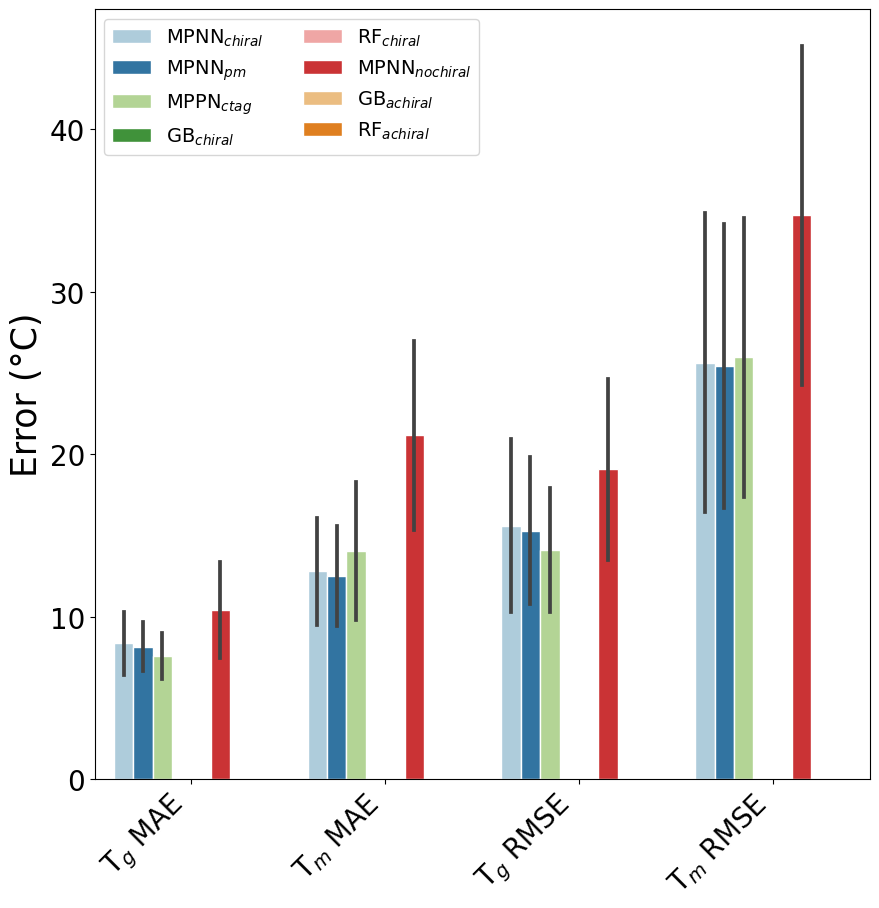

In [5]:
order_map = ["MPNN_global_pm", "MPNN_global_pm_no_ctag", "MPNN_ctag", "GB_pm", "RF_pm", "MPNN_no_chiral", "GB_no_pm", "RF_no_pm"]
order_map = {k: i for i, k in enumerate(order_map)}


fig, ax = plt.subplots(1, 1, figsize=(10, 10))

df_plot = kfold_err_melt_df[kfold_err_melt_df.model.str.contains("|".join([i + "$" for i in order_map]))].copy()
df_plot.loc[:, "model"] = df_plot.model.apply(lambda s: replace_dict[s])
df_plot.loc[:, "variable"] = df_plot.variable.apply(lambda s: replace_var_dict[s])
order_map = {replace_dict[k]: i for i, k in enumerate(order_map)}

# Actual Plot Stuff
# sns.barplot(y="value", x="model", hue="variable", data=kfold_err_melt_df)#, order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"], ax=ax)
sns.barplot(y="value",
            x="variable",
            data=df_plot,
            ax=ax,
            palette=sns.color_palette("Paired"),
            hue="model",
            hue_order=order_map.keys(),
            order=["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE"],#, "Tg_RMSE", "Tm_RMSE"],
            edgecolor="white",
            errorbar="sd"
           )
# Legend Stuff
ax.legend(ncol=2, fontsize=14)

ax.set_ylabel("Error (°C)")
ax.set_xlabel("")
# ax.set_xticklabels(["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE",])

# ax.set_yscale("log")
plt.xticks(rotation=45, ha="right")

ax.legend(ncol=2, fontsize=14)
label_size = 25
tick_size = 20
ax.set_ylabel("Error (°C)", fontsize=label_size)
# ax.set_xlabel(fontsize=label_size)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)

# plt.savefig("MPNN_only_results.png", dpi=300)
# ax.set_ylim(0, 400)
# ax.set_xlim(0, 400)

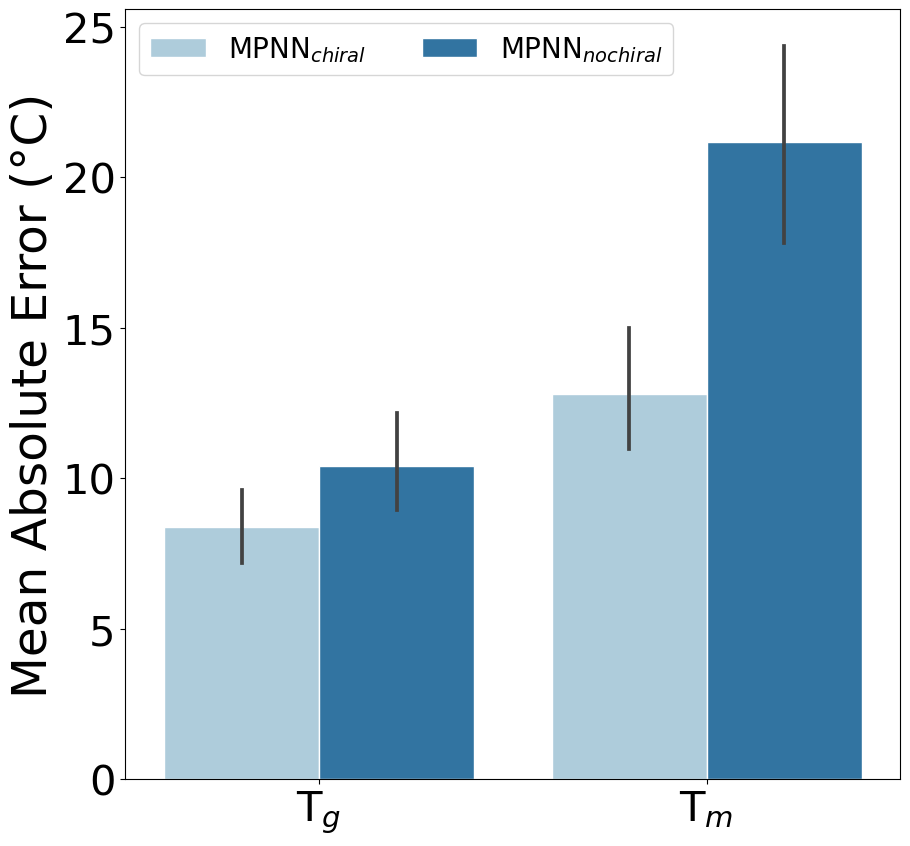

In [13]:
order_map = ["MPNN_global_pm", "MPNN_no_chiral"]
order_map = {k: i for i, k in enumerate(order_map)}

df = kfold_err_melt_df.copy()
df.loc[:, "model"] = df.model.map(lambda s: replace_dict[s] if s in replace_dict.keys() else None)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

df_plot = kfold_err_melt_df[kfold_err_melt_df.model.str.contains("|".join([i + "$" for i in order_map]))].copy()
df_plot.loc[:, "model"] = df_plot.model.apply(lambda s: replace_dict[s])
df_plot.loc[:, "variable"] = df_plot.variable.apply(lambda s: replace_var_dict[s])
order_map = {replace_dict[k]: i for i, k in enumerate(order_map)}

# Actual Plot Stuff
# sns.barplot(y="value", x="model", hue="variable", data=kfold_err_melt_df)#, order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"], ax=ax)
sns.barplot(y="value",
            x="variable",
            data=df_plot,
            ax=ax,
            palette=sns.color_palette("Paired"),
            hue="model",
            hue_order=order_map.keys(),
            order=["T$_{g}$ MAE", "T$_{m}$ MAE"],#, "Tg_RMSE", "Tm_RMSE"],
            edgecolor="white"
           )
# Legend Stuff
ax.legend(ncol=2, fontsize=14)

ax.set_ylabel("Error (°C)")
ax.set_xlabel("")
# ax.set_xticklabels(["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE",])

# ax.set_yscale("log")
# plt.xticks(rotation=45, ha="right")

ax.legend(ncol=2, fontsize=20)
label_size = 35
tick_size = 30
ax.set_ylabel("Mean Absolute Error (°C)", fontsize=label_size)
ax.set_xticklabels(["T$_g$", "T$_m$"])
# ax.set_xlabel(fontsize=label_size)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)

plt.savefig("MPNN_chiral_nonchiral_results.png", dpi=300)
# ax.set_ylim(0, 400)
# ax.set_xlim(0, 400)

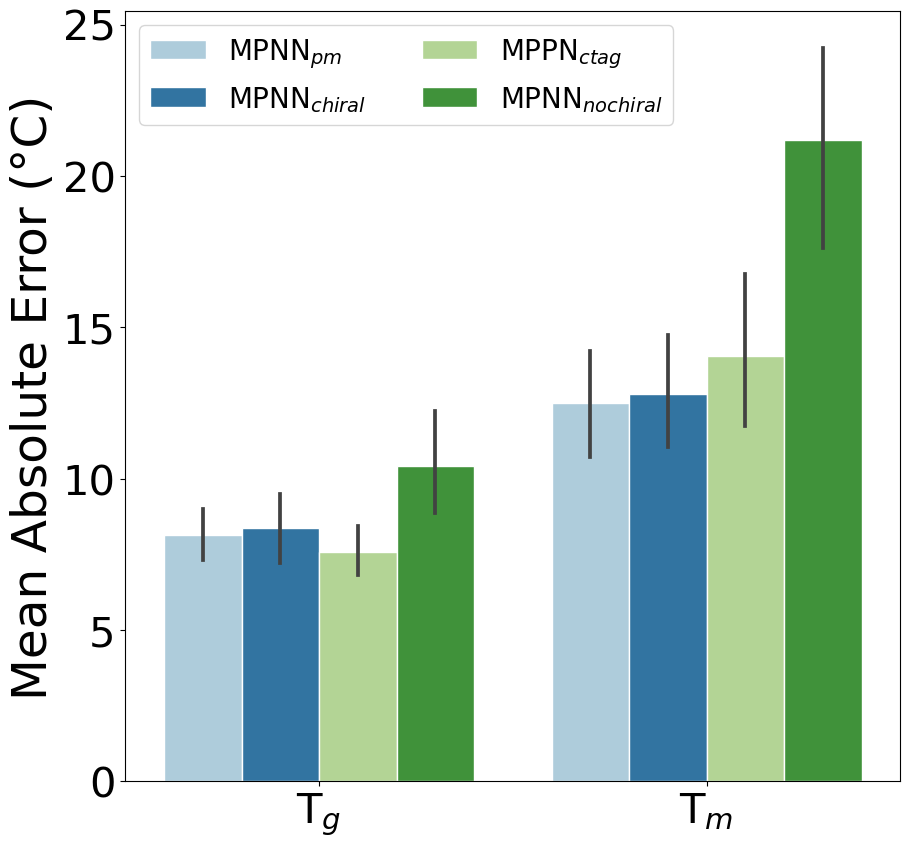

In [14]:
order_map = ["MPNN_global_pm_no_ctag", "MPNN_global_pm", "MPNN_ctag", "MPNN_no_chiral"]
order_map = {k: i for i, k in enumerate(order_map)}

df = kfold_err_melt_df.copy()
df.loc[:, "model"] = df.model.map(lambda s: replace_dict[s] if s in replace_dict.keys() else None)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

df_plot = kfold_err_melt_df[kfold_err_melt_df.model.str.contains("|".join([i + "$" for i in order_map]))].copy()
df_plot.loc[:, "model"] = df_plot.model.apply(lambda s: replace_dict[s])
df_plot.loc[:, "variable"] = df_plot.variable.apply(lambda s: replace_var_dict[s])
order_map = {replace_dict[k]: i for i, k in enumerate(order_map)}

# Actual Plot Stuff
# sns.barplot(y="value", x="model", hue="variable", data=kfold_err_melt_df)#, order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"], ax=ax)
sns.barplot(y="value",
            x="variable",
            data=df_plot,
            ax=ax,
            palette=sns.color_palette("Paired"),
            hue="model",
            hue_order=order_map.keys(),
            order=["T$_{g}$ MAE", "T$_{m}$ MAE"],#, "Tg_RMSE", "Tm_RMSE"],
            edgecolor="white"
           )
# Legend Stuff
ax.legend(ncol=2, fontsize=14)

ax.set_ylabel("Error (°C)")
ax.set_xlabel("")
# ax.set_xticklabels(["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE",])

# ax.set_yscale("log")
ax.legend(ncol=2, fontsize=20)
label_size = 35
tick_size = 30
ax.set_ylabel("Mean Absolute Error (°C)", fontsize=label_size)
ax.set_xticklabels(["T$_g$", "T$_m$"])
# ax.set_xlabel(fontsize=label_size)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)

plt.savefig("MPNN_allchiral_nonchiral_results.png", dpi=300)
# ax.set_ylim(0, 400)
# ax.set_xlim(0, 400)

In [13]:
def bar(ax):
    order_map = ["MPNN_global_pm", "MPNN_global_pm_no_ctag", "MPNN_ctag", "GB_pm", "RF_pm", "MPNN_no_chiral", "GB_no_pm", "RF_no_pm"]
#     order_map = ["MPNN_global_pm", "MPNN_no_chiral"]
    order_map = {k: i for i, k in enumerate(order_map)}

    df_plot = kfold_err_melt_df[kfold_err_melt_df.model.str.contains("|".join([i + "$" for i in order_map]))]
    # Actual Plot Stuff
    # sns.barplot(y="value", x="model", hue="variable", data=kfold_err_melt_df)#, order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"], ax=ax)
    sns.barplot(y="value",
                x="variable",
                data=df_plot,
                ax=ax,
                palette=sns.color_palette("Paired"),
                hue="model",
                hue_order=order_map.keys(),
                order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"],#, "Tg_RMSE", "Tm_RMSE"],
                edgecolor="white"
               )
    # Legend Stuff
    ax.legend(loc="right", ncol=1, bbox_to_anchor=(.6, .5, 1, 0))

    ax.set_ylabel("Error (°C)")
    ax.set_xlabel("")
    # ax.set_xticklabels(["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE",])

#     ax.set_yscale("log")
    # plt.xticks(rotation=45, ha="right")

# All Plots

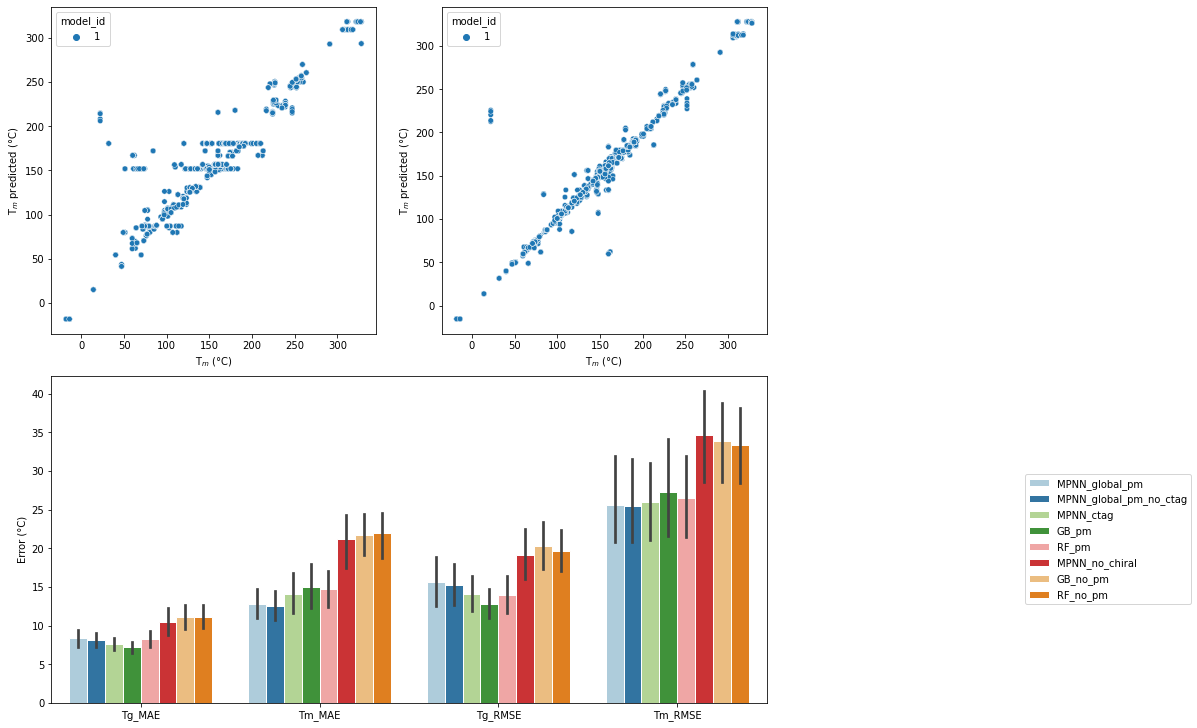

In [14]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = plt.GridSpec(2, 2, figure=fig)
ax_achiral = fig.add_subplot(gs[0, 0])
ax_chiral = fig.add_subplot(gs[0, 1])
ax_bar = fig.add_subplot(gs[1, :])

kfolds = [1]
parity(ax=ax_achiral, df=achiral_df, prop=prop, kfolds=kfolds)
parity(ax=ax_chiral, df=chiral_df, prop=prop, kfolds=kfolds)
bar(ax=ax_bar)

plt.show()

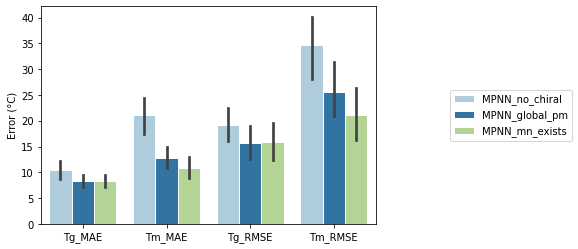

In [15]:
def bar(ax):
    order_map = ["MPNN_no_chiral", "MPNN_global_pm",  "MPNN_mn_exists"]
#     order_map = ["MPNN_global_pm", "MPNN_no_chiral"]
    order_map = {k: i for i, k in enumerate(order_map)}

    df_plot = kfold_err_melt_df[kfold_err_melt_df.model.str.contains("|".join([i + "$" for i in order_map]))]
    # Actual Plot Stuff
    # sns.barplot(y="value", x="model", hue="variable", data=kfold_err_melt_df)#, order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"], ax=ax)
    sns.barplot(y="value",
                x="variable",
                data=df_plot,
                ax=ax,
                palette=sns.color_palette("Paired"),
                hue="model",
                hue_order=order_map.keys(),
                order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"],#, "Tg_RMSE", "Tm_RMSE"],
                edgecolor="white"
               )
    # Legend Stuff
    ax.legend(loc="right", ncol=1, bbox_to_anchor=(.6, .5, 1, 0))

    ax.set_ylabel("Error (°C)")
    ax.set_xlabel("")
    # ax.set_xticklabels(["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE",])

#     ax.set_yscale("log")
    # plt.xticks(rotation=45, ha="right")
    
fig, ax = plt.subplots(1, 1)
bar(ax)

In [16]:
kfold_err_melt_df.groupby(by=["model", "variable"]).agg("mean").reset_index().sort_values(by=["value"]).head(25)

,model,variable,model_id,value
24,MPNN_RBF_dblPm,Tg_MAE,4.5,6.637130
20,GB_pm,Tg_MAE,4.5,7.215458
28,MPNN_ctag,Tg_MAE,4.5,7.586355
56,MPNN_random_pm,Tg_MAE,4.5,7.811100
36,MPNN_global_pm_mn_data,Tg_MAE,4.5,7.900096
12,ET_pm,Tg_MAE,4.5,8.030643
40,MPNN_global_pm_no_ctag,Tg_MAE,4.5,8.152159
64,RF_pm,Tg_MAE,4.5,8.244372
48,MPNN_mn_exists,Tg_MAE,4.5,8.263890
32,MPNN_global_pm,Tg_MAE,4.5,8.365371


In [17]:
order_map = ["MPNN_no_chiral", "MPNN_global_pm",  "MPNN_mn_exists"]
order_map = {k: i for i, k in enumerate(order_map)}
df_plot = kfold_err_melt_df[kfold_err_melt_df.model.str.contains("|".join([i + "$" for i in order_map]))]

In [18]:
df = df_plot.reset_index(drop=True)
df.to_csv("three_model_df.csv")

# $M_n$ Binning

In [66]:
replace_dict = {
    "MPNN_no_chiral": "MPNN$_{achiral}$",
    "MPNN_global_pm": "MPNN$_{chiral}$",
    "MPNN_mn_exists": "MPNN$_{Mn}$"
}

replace_var_dict = {"Tm_MAE": "T$_{m}$ MAE", "Tg_MAE": "T$_{g}$ MAE", "Tg_RMSE": "T$_{g}$ RMSE", "Tm_RMSE": "T$_{m}$ RMSE"}

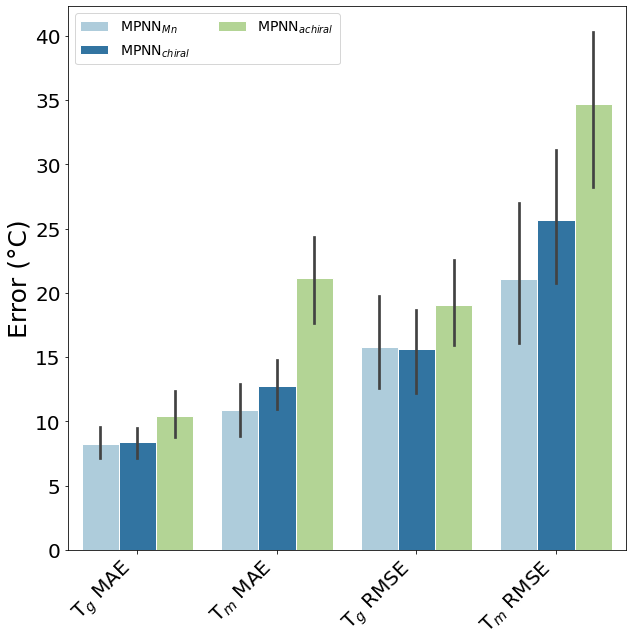

In [67]:
order_map = ["MPNN_mn_exists", "MPNN_global_pm", "MPNN_no_chiral",]
order_map = {k: i for i, k in enumerate(order_map)}

df = kfold_err_melt_df.copy()
df.loc[:, "model"] = df.model.map(lambda s: replace_dict[s] if s in replace_dict.keys() else None)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

df_plot = kfold_err_melt_df[kfold_err_melt_df.model.str.contains("|".join([i + "$" for i in order_map]))].copy()
df_plot.loc[:, "model"] = df_plot.model.apply(lambda s: replace_dict[s])
df_plot.loc[:, "variable"] = df_plot.variable.apply(lambda s: replace_var_dict[s])
order_map = {replace_dict[k]: i for i, k in enumerate(order_map)}

# Actual Plot Stuff
# sns.barplot(y="value", x="model", hue="variable", data=kfold_err_melt_df)#, order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"], ax=ax)
sns.barplot(y="value",
            x="variable",
            data=df_plot,
            ax=ax,
            palette=sns.color_palette("Paired"),
            hue="model",
            hue_order=order_map.keys(),
            order=["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE"],#, "Tg_RMSE", "Tm_RMSE"],
            edgecolor="white"
           )
# Legend Stuff
ax.legend(ncol=2, fontsize=14)

ax.set_ylabel("Error (°C)")
ax.set_xlabel("")
# ax.set_xticklabels(["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE",])

# ax.set_yscale("log")
plt.xticks(rotation=45, ha="right")

label_size = 25
tick_size = 20
ax.set_ylabel("Error (°C)", fontsize=label_size)
# ax.set_xlabel(fontsize=label_size)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)

# plt.savefig("mn_data_RBF_MPNN.png", dpi=300)
# ax.set_ylim(0, 400)
# ax.set_xlim(0, 400)

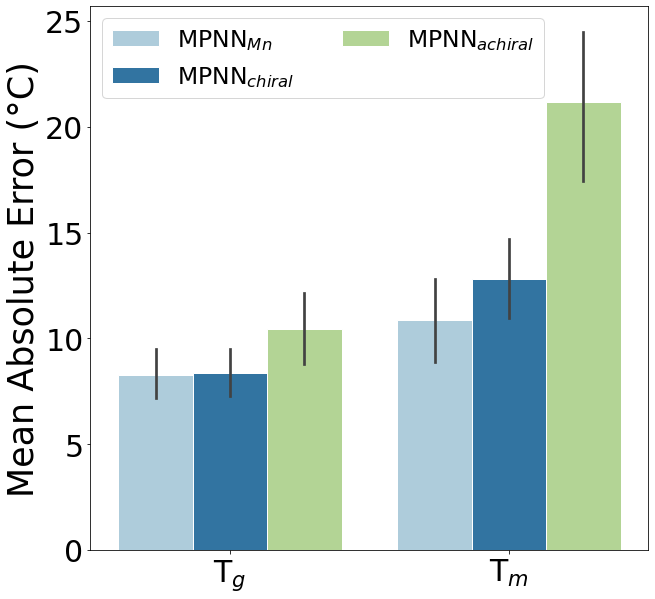

In [72]:
order_map = ["MPNN_mn_exists", "MPNN_global_pm", "MPNN_no_chiral",]
order_map = {k: i for i, k in enumerate(order_map)}

df = kfold_err_melt_df.copy()
df.loc[:, "model"] = df.model.map(lambda s: replace_dict[s] if s in replace_dict.keys() else None)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

df_plot = kfold_err_melt_df[kfold_err_melt_df.model.str.contains("|".join([i + "$" for i in order_map]))].copy()
df_plot.loc[:, "model"] = df_plot.model.apply(lambda s: replace_dict[s])
df_plot.loc[:, "variable"] = df_plot.variable.apply(lambda s: replace_var_dict[s])
order_map = {replace_dict[k]: i for i, k in enumerate(order_map)}

# Actual Plot Stuff
# sns.barplot(y="value", x="model", hue="variable", data=kfold_err_melt_df)#, order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"], ax=ax)
sns.barplot(y="value",
            x="variable",
            data=df_plot,
            ax=ax,
            palette=sns.color_palette("Paired"),
            hue="model",
            hue_order=order_map.keys(),
            order=["T$_{g}$ MAE", "T$_{m}$ MAE"],#, "Tg_RMSE", "Tm_RMSE"],
            edgecolor="white"
           )
# Legend Stuff
ax.legend(ncol=2, fontsize=14)

ax.set_ylabel("Error (°C)")
ax.set_xlabel("")
# ax.set_xticklabels(["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE",])

# ax.set_yscale("log")
ax.legend(ncol=2, fontsize=23.5)
label_size = 35
tick_size = 30
ax.set_ylabel("Mean Absolute Error (°C)", fontsize=label_size)
ax.set_xticklabels(["T$_g$", "T$_m$"])
# ax.set_xlabel(fontsize=label_size)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)


# plt.savefig("mn_data_RBF_MPNN.png", dpi=300)
# ax.set_ylim(0, 400)
# ax.set_xlim(0, 400)

plt.savefig("Mn_with_and_without")

# $M_n$ data only

In [ ]:
replace_dict = {
    "MPNN_global_pm_mn_data": "MPNN$_{chiral}^{M_n}$",
    "MPNN_RBF_dblPm": "MPNN$_{RBF}^{M_n}$",
}

replace_var_dict = {"Tm_MAE": "T$_{m}$ MAE", "Tg_MAE": "T$_{g}$ MAE", "Tg_RMSE": "T$_{g}$ RMSE", "Tm_RMSE": "T$_{m}$ RMSE"}

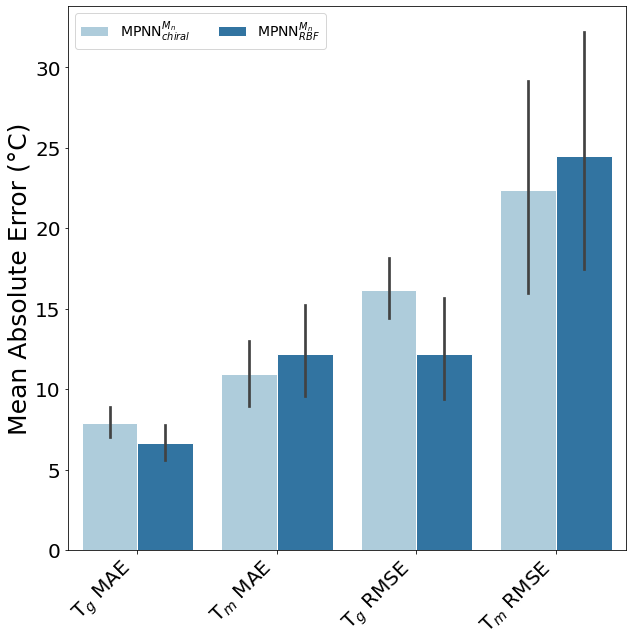

In [ ]:
order_map = ["MPNN_global_pm_mn_data", "MPNN_RBF_dblPm"]
order_map = {k: i for i, k in enumerate(order_map)}

df = kfold_err_melt_df.copy()
df.loc[:, "model"] = df.model.map(lambda s: replace_dict[s] if s in replace_dict.keys() else None)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

df_plot = kfold_err_melt_df[kfold_err_melt_df.model.str.contains("|".join([i + "$" for i in order_map]))].copy()
df_plot.loc[:, "model"] = df_plot.model.apply(lambda s: replace_dict[s])
df_plot.loc[:, "variable"] = df_plot.variable.apply(lambda s: replace_var_dict[s])
order_map = {replace_dict[k]: i for i, k in enumerate(order_map)}

# Actual Plot Stuff
# sns.barplot(y="value", x="model", hue="variable", data=kfold_err_melt_df)#, order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"], ax=ax)
sns.barplot(y="value",
            x="variable",
            data=df_plot,
            ax=ax,
            palette=sns.color_palette("Paired"),
            hue="model",
            hue_order=order_map.keys(),
            order=["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE"],#, "Tg_RMSE", "Tm_RMSE"],
            edgecolor="white"
           )
# Legend Stuff
ax.legend(ncol=2, fontsize=14)

ax.set_ylabel("Error (°C)")
ax.set_xlabel("")
# ax.set_xticklabels(["T$_{g}$ MAE", "T$_{m}$ MAE", "T$_{g}$ RMSE", "T$_{m}$ RMSE",])

# ax.set_yscale("log")
plt.xticks(rotation=45, ha="right")

label_size = 25
tick_size = 20
ax.set_ylabel("Error (°C)", fontsize=label_size)
# ax.set_xlabel(fontsize=label_size)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)

plt.savefig("mn_data_RBF_MPNN.png", dpi=300)
# ax.set_ylim(0, 400)
# ax.set_xlim(0, 400)

In [5]:
# ind_df.to_csv("individual_df.csv", index=False)
ind_df = pd.read_csv("individual_df.csv")